In [9]:
import sys
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy

In [10]:
#load the dataset
data = pd.read_csv('creditcard.csv')

In [11]:
#exploring the dataset
print(data.columns)
#These V columns were obtained from PCA transformation. Essentially,
#to hide the identidity of the person making the transaction.

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
print(data.shape)


(284807, 31)


In [14]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [15]:
#gonna have to account for the fact that the mean under the class column is near 0. 
#Meaning we have a lot of valid transactions compared to fradulent.

In [27]:
data = pd.read_csv('creditcard.csv')

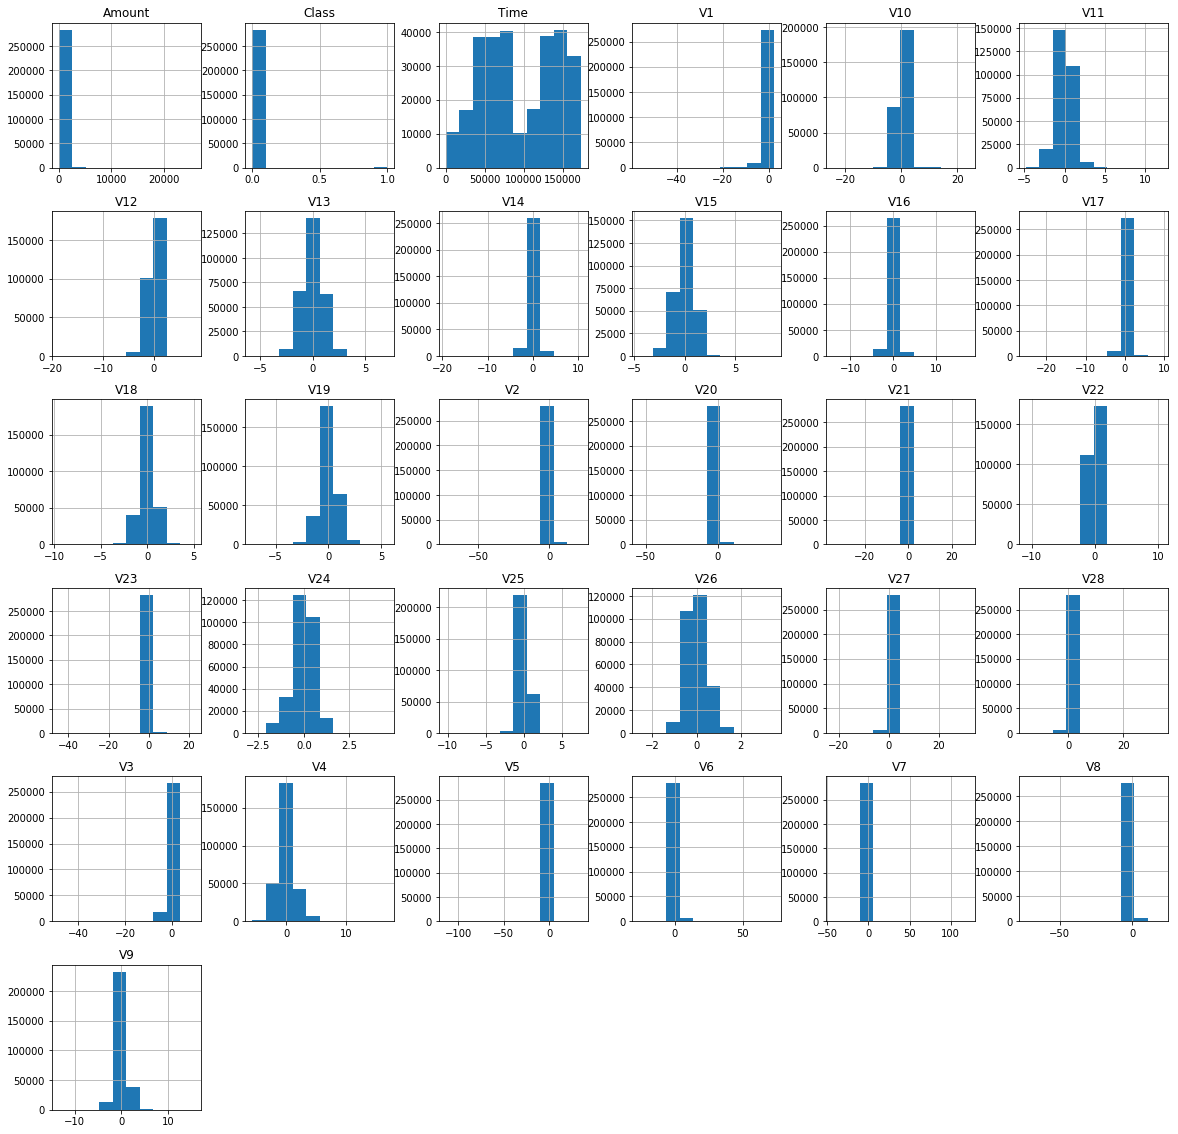

In [30]:
data.hist(figsize = (20,20))
plt.show()

In [104]:
#Now we want to determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class']== 0]

fraud_overview = fraud.describe()
valid_overview = valid.describe()
print(fraud_overview)

#It's important to know an outlier fraction as we don't want to over predict
#or under predict anything.
outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))
print(valid_overview)


                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...    \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...     
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...     
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...     
min    -22.105532   -6.406267  -43.557242  -41.

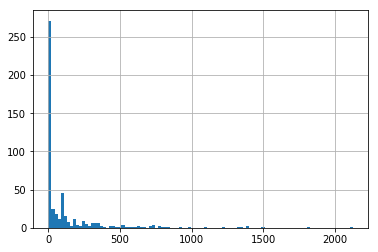

In [92]:
fraud_amount = fraud["Amount"].hist(bins=100);


In [ ]:
'''Something that's strange is the median is lower but the mean is higher 
for the fraud cases. What this suggests is that there are criminals
who are high valued and some that focus on withdrawels "below the radar"
to avoid detection.

In [79]:
'''Looking deeper into the fraudelent cases. We can se that 
the min fraudlent transaction was 0 euro and others as low as 68 cent.
This most likely tells us some people test out cards before they
spend it on something higher.

Because as we can see, the highest fraudlent transaction was at 2125 euro.

We can also the quartile ranges above '''

'Looking deeper into the fraudelent cases. We can se that \nthe min fraudlent transaction was 0 euro and others as low as 68 cent.\nThis most likely tells us some people test out cards before they\nspend it on something higher.\n\nBecause as we can see, the highest fraudlent transaction was at 2125 euro.\n\nWe can also the quartile ranges above '

AxesSubplot(0.125,0.125;0.775x0.755)


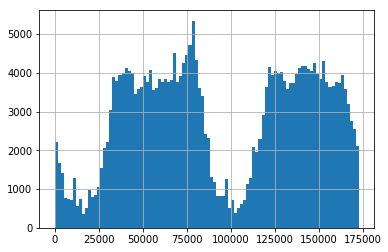

In [86]:
data_time = data["Time"].hist(bins=100)
print(data_time)

In [ ]:
'''we can see theres a major drop of transactions in the night compared
to the day which is understandable. People sleep.

but it begs the question as to; are the criminlas day or night creatures?'''

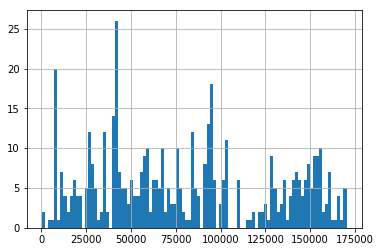

In [93]:
fraud_time = fraud["Time"].hist(bins=100);

In [ ]:
'''we can see that fraud cases accumlate during the night'''

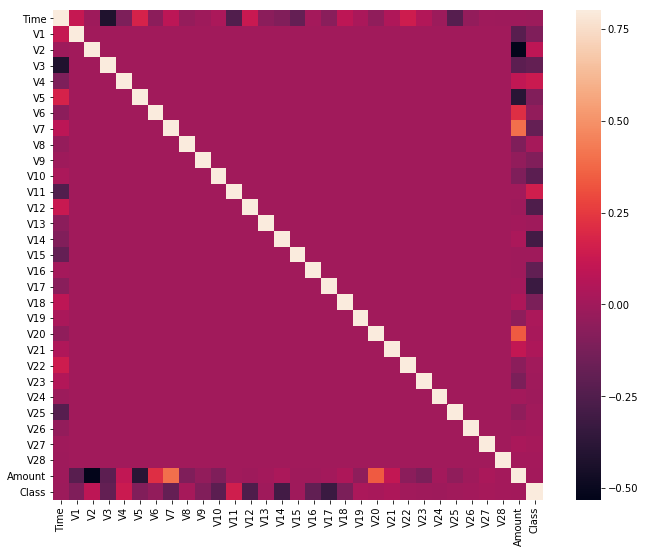

In [37]:
#correlation matrix
#Essentially we want to define what's important for the over classification
#of the model. What do we need to or not need to cut.

corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
'''Due to the PCA transformatiions it becomes difficult to conclude 
certain results.'''

In [38]:
'''You can see from the pink/reddish color in the middle that we have. alot
of value close to 0 so there isn't strong realtionships between our
V1 - V28 telling us that it doesn't matter about the location or personal 
details of the individual in order to detect a fraudelent payment. And of
course that is the case, because this dataset has already been processed
and we knbow what's fradulent and not.

example, asuming v17 on the left side is the address of an individual and
v14 on the bottom is, let's say a credit number. It doesn't affect each other
in order to determine if a payment is fradulent. Only because the data has
been pre-processed. These however could be other values as v17 is inversely
affecting another v value. However, due to privacy protectection it becomes
hard for us to get a true meaning from what it means.

But we now know what we need to cut to elimnate over classification



"You can see from the pink/reddish color in the middle that we have. alot\nof value close to 0 so there isn't strong realtionships between our\nV1 - V28 telling us that it doesn't matter about the location or personal \ndetails of the individual in order to detect a fraudelent payment\n\nexample, asuming v17 on the left side is the address of an individual and\nv14 on the bottom is, let's say a credit number. It doesn't affect each other\nin order to determine if a payment is fradulent.\n\nThis tells us that\n\n\nThere isn't a strong correlation between amount and time regarding if it\nwas fradulent"

In [43]:
#get all columns from data frame
columns = data.columns.tolist()

#filter to remove data we don't want. Anomly detection, unsupervisded learning
columns = [c for c in columns if c not in ['Class']]

#Store the variable we'll be predictiing
target = 'Class'

x = data[columns]
y = data[target]


#everything except the class label
print(x.shape)

#one dimensional array that has class labels for all 284k entries
print(y.shape)

(284807, 30)
(284807,)


In [99]:

from sklearn.metrics import classification_report, accuracy_score

#returns anomly score of each sample. Isolate points that have shorter 
#pathelenghts in a tree based system (anonomlies)
from sklearn.ensemble import IsolationForest

#An unsupervised method. Gets an anomly score. Which means, 
#it gets the local deviation of density of a given smaple with respect o its neighbours
#its essentially a version of k-nearest neighbours
from sklearn.neighbors import LocalOutlierFactor


#define a random state
state = 1

#define outlier detection methods
classifiers = {
    
    "Isolation Forest": IsolationForest(behaviour = 'new',max_samples = len(x),
                                       contamination = outlier_fraction,
                                       random_state = state),
    
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20, 
                                               contamination = outlier_fraction) 
}








In [100]:
#Fit the model
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):

   #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    #reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    #run classification metrics
    print('{}: {}'.format(clf_name,n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y,y_pred))
    

Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
'''We can see that the program can 100% accurately predict a valid payment
it, only 35% of the time can detect a fraudlent payment.

What we find here is (even with the limited data we had) is that 
a single pass analysis isn't good enough to predict a heavily biased dataset.
But a multiple epoch system should by putting if we, emphasise the fraud
bias at the start so our program can essentially, predict fraudelent transactions better.


'''